# Regresión lineal multivariable

## Importando datos

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
            header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Ares\AppData\Local\Temp\ipykernel_11772\1444682622.py:3: SyntaxWarning: invalid escape sequence '\s'
  header=None, sep='\s+')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Creando modelo con sklearn

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df[['RM', 'INDUS']].values
y = df['MEDV'].values.reshape(-1, 1)
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

In [21]:
# Realizar predicciones usando el modelo entrenado
y_pred_std = slr.predict(X_std)

# Transformar las predicciones de vuelta a la escala original
y_pred = sc_y.inverse_transform(y_pred_std)
y_original = sc_y.inverse_transform(y_std)

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, max_error, r2_score

# Calcular R^2
r2 = r2_score(y_original, y_pred)

# Calcular R^2 ajustado
n = len(y_original)  # número de muestras
k = X.shape[1]       # número de predictores
r2_adjusted = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Calcular otras métricas
mape = mean_absolute_percentage_error(y_original, y_pred)
mse = mean_squared_error(y_original, y_pred)
var_residual = mse  # En este contexto, MSE puede interpretarse como varianza residual
max_err = max_error(y_original, y_pred)

# Mostrar los resultados
print(f"Error Absoluto Medio Porcentual (MAPE): {mape * 100:.2f}%")
print(f"Coeficiente de Determinación Ajustado (R^2 ajustado): {r2_adjusted:.2f}")
print(f"Varianza Residual (MSE): {var_residual:.2f}")
print(f"Error Máximo: {max_err:.2f}")


Error Absoluto Medio Porcentual (MAPE): 23.53%
Coeficiente de Determinación Ajustado (R^2 ajustado): 0.53
Varianza Residual (MSE): 39.15
Error Máximo: 40.08


## Análisis de resultados

c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


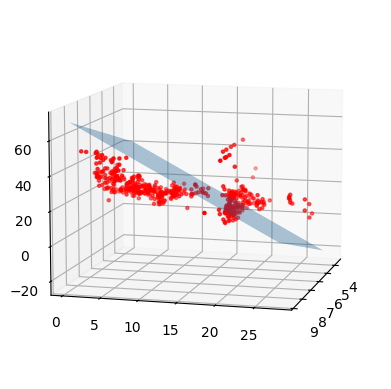

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd  # Asegúrate de importar pandas si lo usas
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import time


# Suponiendo que tienes tus datos en un DataFrame df, y un modelo de regresión lineal entrenado slr

x1_range = np.arange(df['RM'].min(), df['RM'].max(), step=0.1)
x2_range = np.arange(df['INDUS'].min(), df['INDUS'].max(), step=0.1)

X1, X2 = np.meshgrid(x1_range, x2_range)

plano = pd.DataFrame({'RM': X1.ravel(), 'INDUS': X2.ravel()})
pred = slr.predict(plano).reshape(X1.shape)
pred = sc_y.inverse_transform(pred)  # Si estás utilizando un escalador, de lo contrario elimina esta línea


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Cambiado de fig.gca() a fig.add_subplot()
ax.plot_surface(X1, X2, pred, alpha=0.4)

ax.scatter3D(df['RM'], df['INDUS'], df['MEDV'], color='r', marker='.')


ax.view_init(elev=10, azim=15)
plt.show()


## Generando predicción con el modelo

In [ ]:
num_rooms_std = sc_x.transform(np.array([5.0]).reshape(-1, 1))
price_std = slr.predict(num_rooms_std)
print('El precio en miles es de %.3f'%
      sc_y.inverse_transform(price_std))

El precio en miles es de 10.840
